<a href="https://colab.research.google.com/github/oktvnlaaa/Machine-Learningg/blob/main/Pertemuan_4_Yola_Okta_Vina_2117051052_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pertemuan 4 Machine Learning

# Library

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import yellowbrick

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Dataset

In [ ]:
# buat data tabular seperti dibawah ini
df = pd.DataFrame(
    {
        "ID Buah": pd.Series([1, 2, 3, 4, 5]),
        "Diameter": pd.Series([7.0, 7.1, 6.5, 6.6, 6.8]),
        "Berat": pd.Series([165, 170, 180, 195, 200]),
    }
)

In [ ]:
df

,ID Buah,Diameter,Berat
0,1,7.0,165
1,2,7.1,170
2,3,6.5,180
3,4,6.6,195
4,5,6.8,200


# Algoritma K-Means

In [ ]:
# pemilihan feature
df_train = df.drop("ID Buah", axis=1)
df_train

,Diameter,Berat
0,7.0,165
1,7.1,170
2,6.5,180
3,6.6,195
4,6.8,200


In [ ]:
from pandas.core.dtypes.cast import na_value_for_dtype
# fitting/predict/labeling berdasarkan jumlah kluster (n=2)
n = 2
kmeans_model = KMeans(n_clusters=n, n_init=1, random_state=100).fit(df_train)

In [ ]:
# pelabelan cluster
df["kluster"] = kmeans_model.labels_
df

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,1
3,4,6.6,195,1
4,5,6.8,200,1


In [ ]:
# hasil dari update centroid
print(kmeans_model.cluster_centers_)

[[  7.05       167.5       ]
 [  6.63333333 191.66666667]]


# Tantangan dari algoritma K-Means
Limitasi atau tantangan dari algoritma k-means adalah menentukan nilai centroid diawal dan jumlah kluster yang manual, sehingga perlu ada mekanisme/metode tertentu untuk memilih centroid diawal dan jumlah kluster

# Pemilihan centroid awal


*   Menggunakan pengaturan parameter yang ada di sklearn
*   Lebih lengkapnya bisa baca di dokumentasinya https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html



In [ ]:
# n_cluster merupakan parameter dari jumlah cluster/kelompok yang harus ditentukan
# nilai n_cluster tergantung data, atau bisa berdasarkan metode elbow, dll. Defaultnya 8 atau ketika tidak diisi dengan jumlah cluster=8
# n_init merupakan parameter untuk menetukan berapa kali algoritma k-means dijalankan dengan centroid seed yang berbeda
# nilai n_init bisa 1 atau lebih dari 1, defaultnya 10/auto
# random_state merupakan parameter untuk menetukan angka acak sebagai inisialisasi centroid
# nilai random_state diisi dengan nilai deterministik(0-100), defaultnya none

# atur parameter untuk kmeans_model_2 ini sehingga berbeda dengan parameter kmeans_model sebelumnya
kmeans_model_2 = KMeans(n_clusters=2, n_init="auto").fit(df_train)
df2 = df.copy()
df2["kluster"] = kmeans_model_2.labels_
df2

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,0
3,4,6.6,195,1
4,5,6.8,200,1


**Lihat, Hasil labeling cluster berbeda ketika parameter berbeda**

# Pemilihan jumlah kluster


*   Menggunakan metode ellbow
*   Library nya bisa apa saja, contoh disini menggunakan library scikit yellowbrick cluster https://www.scikit-yb.org/en/latest/api/cluster/elbow.html



In [ ]:
# standarisasi terlebih dahulu dalam bentuk array
x_array = np.array(df_train)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

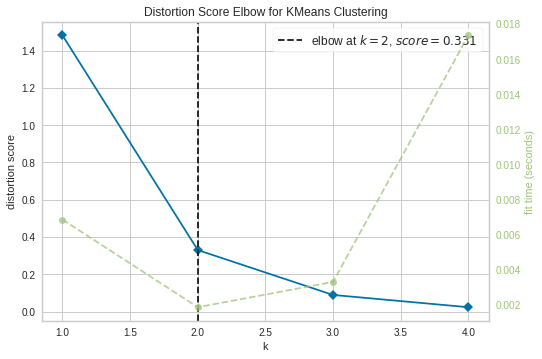

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = KMeans(n_init=1, random_state=100)
visualizer = KElbowVisualizer(km, k=(1, 5), timings=True)
visualizer.fit(x_scaled)
visualizer.show()

**Lihat, Hasil menunjukkan k=2, artinya nilai 2 disini bisa dijadikan acuan untuk jumlah kluster**

#  Tugas


*   Gunakan data dari url ini https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv
*   Hasil bisa berbeda tergantung pengolahan data, pemilihan nilai centroid diawal dan jumlah kluster
*   Yang menjadi penilaian adalah proses coding dari mulai pengambilan data, pengolahan data, hingga penerapan algoritma k-means



# Library

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

import yellowbrick
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv'
df = pd.read_csv(url)

# Karena terdapat error ValueError: Input X contains NaN pada data yang akan dilakukan clustering, maka harus menghapus baris data yang mengandung nilai NaN
df.dropna(inplace=True)

# Untuk mengatasi nilai string "not pass" pada kolom 'pass_test' karena tidak dapat dikonversi ke dalam nilai float
# Mengganti nilai 'not pass' dengan 0 dan nilai 'pass' dengan 1
df['pass_test'] = df['pass_test'].replace('not pass', 0)
df['pass_test'] = df['pass_test'].replace('pass', 1)

# Mengkonversi kolom 'pass_test' ke tipe float
df['pass_test'] = df['pass_test'].astype(float)

In [ ]:
df

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,0.0
2,2022041103,86,71.0,84.0,17.0,21.0,41,0.0
4,2022041105,93,85.0,68.0,29.0,44.0,50,0.0
5,2022041106,85,95.0,34.0,73.0,57.0,98,0.0
6,2022041107,95,79.0,52.0,54.0,85.0,13,0.0
...,...,...,...,...,...,...,...,...
366,2022041467,88,75.0,80.0,11.0,55.0,82,0.0
368,2022041469,96,87.0,55.0,56.0,95.0,11,1.0
369,2022041470,569,83.0,89.0,15.0,86.0,13,0.0
370,2022041471,84,92.0,87.0,97.0,42.0,27,1.0


In [ ]:
# Menentukan besaran variabel yang sama
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7
count,3.120000e+02,3.120000e+02,3.120000e+02,3.120000e+02,3.120000e+02,3.120000e+02,3.120000e+02,3.120000e+02
mean,-1.132481e-10,-1.152924e-16,-5.978124e-16,-3.416071e-17,-4.554761e-17,-1.992708e-17,-5.693451e-17,-1.138690e-16
std,1.001606e+00,1.001606e+00,1.001606e+00,1.001606e+00,1.001606e+00,1.001606e+00,1.001606e+00,1.001606e+00
min,-1.769542e+00,-5.301730e+00,-1.743304e+00,-1.811483e+00,-1.638605e+00,-1.769146e+00,-4.792926e+00,-7.640395e-01
25%,-8.734008e-01,-2.001011e-01,-7.017727e-01,-8.420927e-01,-8.728097e-01,-8.789312e-01,-7.283229e-01,-7.640395e-01
50%,2.274048e-02,-5.917210e-02,-7.418316e-03,1.461204e-01,-6.872518e-02,1.128331e-02,3.379027e-02,-7.640395e-01
75%,9.003569e-01,8.175688e-02,8.026618e-01,8.613984e-01,8.598011e-01,7.801049e-01,8.355968e-01,1.308833e+00
max,1.666824e+00,1.344182e+01,1.728468e+00,1.576676e+00,1.807472e+00,1.832177e+00,1.462752e+00,1.308833e+00


# K-Means

In [ ]:
# mendefinisikan fungsi kmeans dengan inisialisasi sebagai k-means++
kmeans = KMeans(n_clusters=4, n_init="auto")

# fitting the k-means algorithm on scaled data
kmeans.fit(df_scaled)

# inertia on the fitted data
kmeans.inertia_

1743.1673646758868

# Elbow

Text(0, 0.5, 'Inertia')

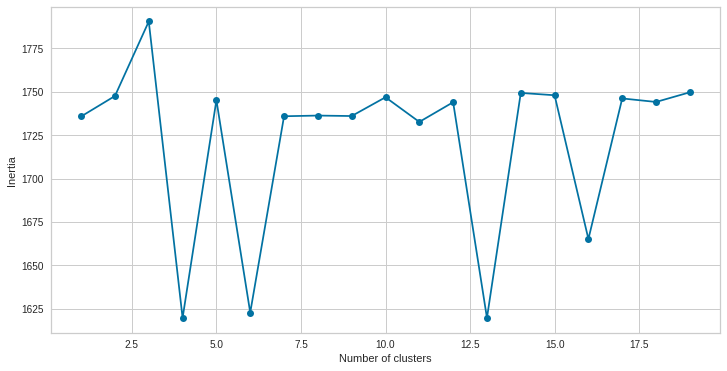

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = 4, n_init="auto")
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# Inisialisasi menggunakan cluster 4
kmeans = KMeans(n_clusters = 4, n_init="auto")
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)

In [ ]:
frame = pd.DataFrame(df_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    103
0     81
3     65
2     63
Name: cluster, dtype: int64

# Jumlah Centroid

In [ ]:
# menentukan jumlah kluster dan centroid awal
n_clusters = 4
init_centroids = [[99, 71.0, 93.0, 52.0, 44.0, 24, 0], [86, 71.0, 84.0, 17.0, 21.0, 41, 0], [93, 85.0, 68.0, 29.0, 44.0, 50, 0], [85, 95.0, 34.0, 73.0, 57.0, 98, 0]]

In [ ]:
#membuat kolom cluster
df["cluster"] = kmeans.labels_
df

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test,cluster
0,2022041101,99,71.0,93.0,52.0,44.0,24,0.0,2
2,2022041103,86,71.0,84.0,17.0,21.0,41,0.0,2
4,2022041105,93,85.0,68.0,29.0,44.0,50,0.0,1
5,2022041106,85,95.0,34.0,73.0,57.0,98,0.0,1
6,2022041107,95,79.0,52.0,54.0,85.0,13,0.0,1
...,...,...,...,...,...,...,...,...,...
366,2022041467,88,75.0,80.0,11.0,55.0,82,0.0,2
368,2022041469,96,87.0,55.0,56.0,95.0,11,1.0,3
369,2022041470,569,83.0,89.0,15.0,86.0,13,0.0,0
370,2022041471,84,92.0,87.0,97.0,42.0,27,1.0,3
